In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('ggplot') # This styles the graphs in a nicer format

In [6]:
#Load and inspect some data - this csv sourced from fight metrics has some information about all MMA fighters
ALL_FIGHTERS = pd.read_csv('Data/1) ALL MMA FIGHTERS.csv')
ALL_FIGHTERS.shape
#2734 observations, each denoting an individual fighter.

(2734, 20)

In [9]:
#Inspection of the first few rows show soft characteristics of fighters such as height, weight and reach.
ALL_FIGHTERS.head(5)

,Full Name,FIRST,LAST,NICKNAME,HT.,Height_FT,Height_INCH,Height_CM,WT.,WEIGHT_LB,WEIGHT_KG,REACH,REACH_INCH,STANCE,W,L,D,BELT,GENDER,DIVISION
0,Aaron Brink,Aaron,Brink,NaN,"6' 3""",6,3,190.50,205 lbs.,205,92.98636,--,0,Orthodox,25,21,0,NaN,M,Light Heavyweight
1,Aaron Ely,Aaron,Ely,The Cyborg,"5' 8""",5,8,172.72,135 lbs.,135,61.23492,--,0,n/a,5,2,0,NaN,M,Bantamweight
2,Aaron Lanfranco,Aaron,Lanfranco,NaN,--,0,0,0.00,155 lbs.,155,70.30676,--,0,n/a,5,1,0,NaN,M,Lightweight
3,Aaron Miller,Aaron,Miller,Blood Spiller,"5' 9""",5,9,175.26,145 lbs.,145,65.77084,--,0,n/a,14,10,0,NaN,M,Featherweight
4,Aaron Phillips,Aaron,Phillips,The Model,"5' 9""",5,9,175.26,135 lbs.,135,61.23492,"70.0""",70,Southpaw,8,2,0,NaN,M,Bantamweight


In [7]:
#FIGHTS['round'].value_counts()
ALL_FIGHTERS.describe() 
#FIGHTS.plot(kind='column', x='round', y='')
#sns.lmplot(x='round', y='time', data=FIGHTS, ci=None)

,Height_FT,Height_INCH,Height_CM,WEIGHT_LB,WEIGHT_KG,REACH_INCH,W,L,D,BELT
count,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2733.000000,0
mean,4.889905,5.136064,162.089905,171.719459,77.890573,29.042429,11.299561,5.245794,0.310282,NaN
std,1.653242,4.028229,53.167683,49.267855,22.347505,35.360529,9.211656,4.852709,0.916915,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,5.000000,1.000000,170.180000,145.000000,65.770840,0.000000,5.000000,2.000000,0.000000,NaN
50%,5.000000,5.000000,177.800000,170.000000,77.110640,0.000000,10.000000,4.000000,0.000000,NaN
75%,6.000000,9.000000,182.880000,190.000000,86.182480,71.000000,15.000000,7.000000,0.000000,NaN
max,7.000000,11.000000,226.060000,770.000000,349.265840,84.000000,127.000000,74.000000,11.000000,NaN


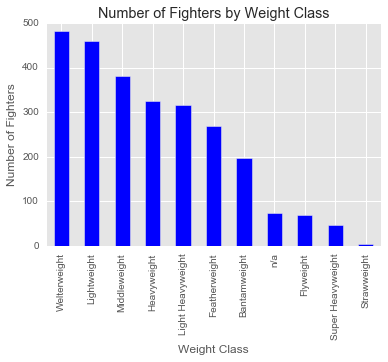

In [11]:
#Since 2000, fighters fight in specific weight divisions. Lets analyse and look for any trends/patterns within each weight class
#first, let's look at males
MALE_FIGHTERS = ALL_FIGHTERS[ALL_FIGHTERS.GENDER=='M']
MALE_FIGHTERS.shape
#2624 fighters are male
MALE_FIGHTERS.DIVISION.value_counts().plot(kind='bar', title='Number of Fighters by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Number of Fighters')
plt.show()  

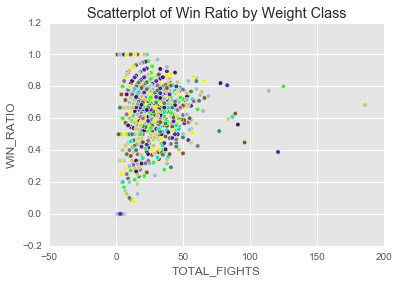

In [14]:
#Let's have a look at a division level, the win ratios. 
#We are going to define the win ratio as total number of WINs/Total Number of Fights by the fighter
MALE_FIGHTERS.loc[:,('TOTAL_FIGHTS')] = (MALE_FIGHTERS.loc[:,('W')] + MALE_FIGHTERS.loc[:,('D')] + MALE_FIGHTERS.loc[:,('L')])
MALE_FIGHTERS.loc[:,('WIN_RATIO')] = MALE_FIGHTERS.loc[:,('W')] / MALE_FIGHTERS.loc[:,('TOTAL_FIGHTS')]
MALE_FIGHTERS.head(5)

#first look at all fighters
groups = MALE_FIGHTERS.groupby('DIVISION')
colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')
MALE_FIGHTERS.plot(kind='scatter',x='TOTAL_FIGHTS',y='WIN_RATIO',title='Scatterplot of Win Ratio by Weight Class',c=colors)

#Just a particular division
#TEST2 = MALE_FIGHTERS[MALE_FIGHTERS.DIVISION=='Middleweight']
#TEST2.plot(kind='scatter',x='TOTAL_FIGHTS',y='WIN_RATIO',title='Win Ratio Scatter')

ValueError: zero-size array to reduction operation minimum which has no identity

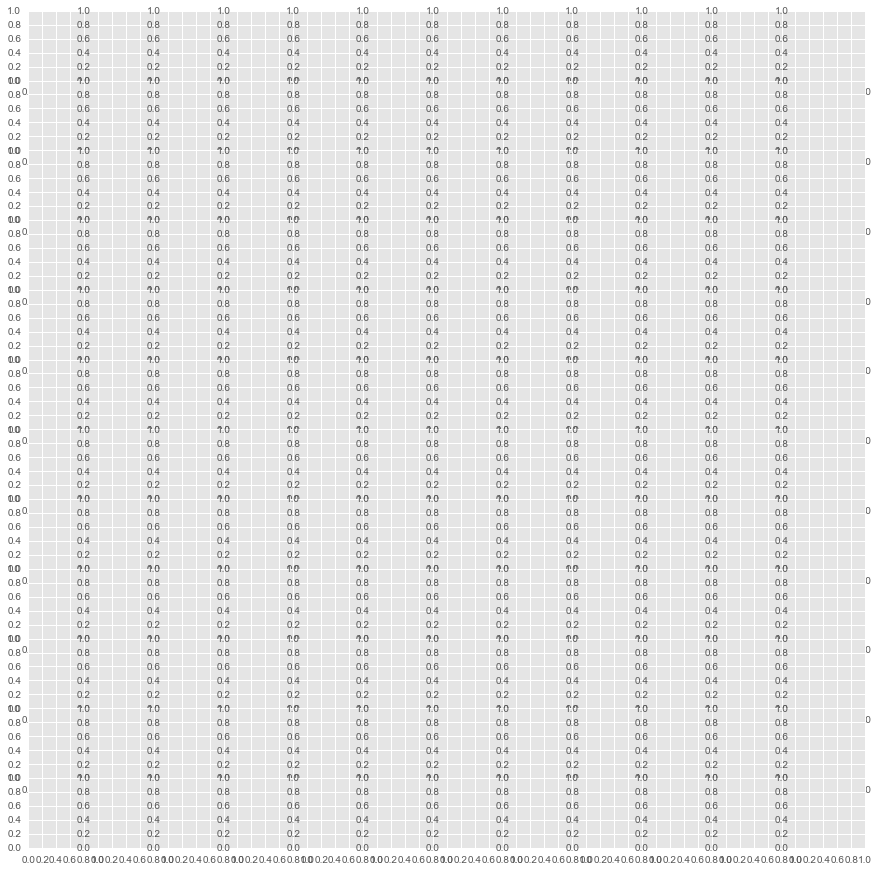

In [42]:
MIDDLEMALE = MALE_FIGHTERS[MALE_FIGHTERS.DIVISION=='Middleweight']
pd.scatter_matrix(MIDDLEMALE, figsize=(15,15))

In [16]:
MALE_FIGHTERS.method.value_counts().plot(kind='bar', title='Method of Victory')
plt.xlabel('Victory Method')
plt.ylabel('Count')
#plt.show()                                  # show plot window (if it doesn't automatically appear)


AttributeError: 'DataFrame' object has no attribute 'method'

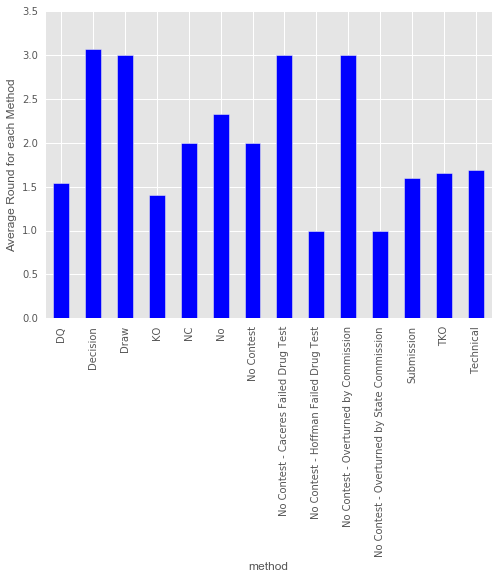

In [49]:
FIGHTS.groupby('method').round.mean().plot(kind='bar')
plt.ylabel('Average Round for each Method')

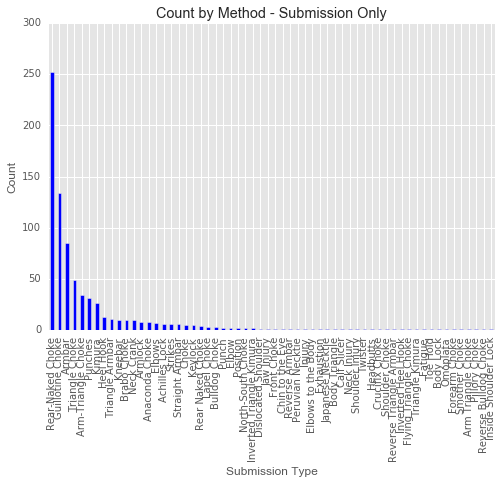

In [54]:
FIGHTS_SUBONLY = FIGHTS[FIGHTS.method=='Submission']
FIGHTS_SUBONLY.method_d.value_counts().plot(kind='bar', title='Count by Method - Submission Only')
plt.xlabel('Submission Type')
plt.ylabel('Count')

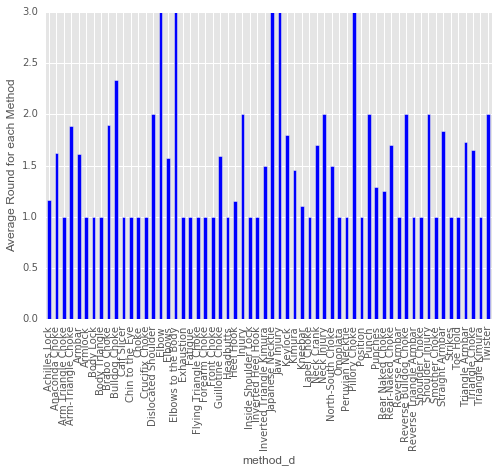

In [52]:
# bar plot of average number of beer servings (per adult per year) by continent
FIGHTS_SUBONLY = FIGHTS[FIGHTS.method=='Submission']
FIGHTS_SUBONLY.groupby('method_d').round.mean().plot(kind='bar')
plt.ylabel('Average Round for each Method')